In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

# --- 参数设定 ---
num_samples = 1000  # 每次采样的点数
r_threshold = 1.0   # 半径阈值，小于此值时分布接近均匀球面
alpha = 0.5         # 控制集聚速度的参数，越大集聚越快

In [2]:
# --- 方法一：修改 cos(θ) 的采样范围 ---
def sample_concentrated_sphere(radius, num_samples, alpha, r_threshold):
    """
    根据半径 r 采样球面点，r 越大越靠近赤道。
    使用方法一：修改 cos(theta) 的采样范围。
    """
    points = np.zeros((num_samples, 3))

    # 1. 计算区间缩放因子 c(r)
    # c_r = 1.0 / (1.0 + alpha * max(0, radius - r_threshold))
    # 使用指数衰减可能效果更平滑
    c_r = np.exp(-alpha * max(0, radius - r_threshold))
    c_r = np.clip(c_r, 1e-6, 1.0) # 限制 c_r 范围，避免为0

    for i in range(num_samples):
        # 4. 采样方位角 phi (均匀)
        phi = 2 * np.pi * np.random.rand()

        # 2. 采样 cos(theta) (在缩小的区间内均匀)
        u = np.random.uniform(-1.0, 1.0) # 在 [-1, 1] 内均匀采样
        v = u * c_r                  # 缩放到 [-c_r, c_r] 内均匀
        theta = np.arccos(v)         # 3. 计算 theta

        # 6. 转换为笛卡尔坐标 (假设半径为 r)
        x = radius * np.sin(theta) * np.cos(phi)
        y = radius * np.sin(theta) * np.sin(phi)
        z = radius * np.cos(theta) # 注意这里用的还是 v = cos(theta)

        points[i] = [x, y, z]

    return points

In [3]:
# --- 可视化函数 ---
def plot_sphere_samples(points, radius, title=""):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=5, alpha=0.6)

    # 画一个参考球体
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x_sph = radius * np.outer(np.cos(u), np.sin(v))
    y_sph = radius * np.outer(np.sin(u), np.sin(v))
    z_sph = radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x_sph, y_sph, z_sph, color='grey', alpha=0.1, rstride=5, cstride=5)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title + f" (Radius = {radius:.2f})")

    # 设置坐标轴范围以保持球形
    max_val = radius * 1.1
    ax.set_xlim([-max_val, max_val])
    ax.set_ylim([-max_val, max_val])
    ax.set_zlim([-max_val, max_val])
    ax.set_aspect('equal') # 保持比例
    plt.show()

In [15]:
# --- 交互式控件 ---
radius_slider = widgets.FloatSlider(min=0.1, max=10.0, step=0.1, value=3.0, description='Radius (r):')
alpha_slider = widgets.FloatSlider(min=0.0, max=2.0, step=0.05, value=alpha, description='Alpha:')
r_thresh_slider = widgets.FloatSlider(min=0.0, max=5.0, step=0.1, value=r_threshold, description='R Threshold:')
n_samples_slider = widgets.IntSlider(min=100, max=5000, step=100, value=num_samples, description='Num Samples:')

In [5]:
# 定义更新函数
def update_plot(radius, alpha_val, r_thresh_val, n_samples_val):
    sampled_points = sample_concentrated_sphere(radius, n_samples_val, alpha_val, r_thresh_val)
    plot_sphere_samples(sampled_points, radius, title="Method 1: Concentrated Sampling")

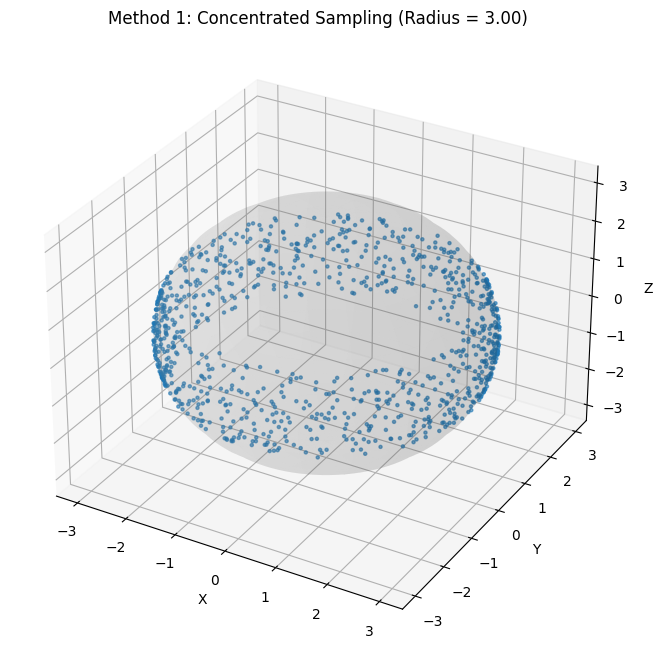

interactive(children=(FloatSlider(value=3.0, description='Radius (r):', max=10.0, min=0.1), FloatSlider(value=…

<function __main__.update_plot(radius, alpha_val, r_thresh_val, n_samples_val)>

In [16]:
# 使用 interact 创建交互式界面
widgets.interact(update_plot, radius=radius_slider, alpha_val=alpha_slider, r_thresh_val=r_thresh_slider, n_samples_val=n_samples_slider)